In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/DSX-Python35

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.0.2r             |       h14c3975_0         3.1 MB  conda-forge
    certifi-2018.8.24          |        py35_1001         139 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    altair-2.2.2               |           py35_1         462 KB  conda-forge
    branca-0.3.1               |             py_0          25 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    ca-certificates-2019.3.9   |       hecc5488_0         146 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         4.0 MB

The following NEW packages will

In [2]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')

Data downloaded!


In [3]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [5]:
newyork_data

{'bbox': [-74.2492599487305,
  40.5033187866211,
  -73.7061614990234,
  40.9105606079102],
 'crs': {'properties': {'name': 'urn:ogc:def:crs:EPSG::4326'}, 'type': 'name'},
 'features': [{'geometry': {'coordinates': [-73.84720052054902,
     40.89470517661],
    'type': 'Point'},
   'geometry_name': 'geom',
   'id': 'nyu_2451_34572.1',
   'properties': {'annoangle': 0.0,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661],
    'borough': 'Bronx',
    'name': 'Wakefield',
    'stacked': 1},
   'type': 'Feature'},
  {'geometry': {'coordinates': [-73.82993910812398, 40.87429419303012],
    'type': 'Point'},
   'geometry_name': 'geom',
   'id': 'nyu_2451_34572.2',
   'properties': {'annoangle': 0.0,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.874294193

In [4]:
neighborhoods_data = newyork_data['features']

In [5]:
neighborhoods_data[0]

{'geometry': {'coordinates': [-73.84720052054902, 40.89470517661],
  'type': 'Point'},
 'geometry_name': 'geom',
 'id': 'nyu_2451_34572.1',
 'properties': {'annoangle': 0.0,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661],
  'borough': 'Bronx',
  'name': 'Wakefield',
  'stacked': 1},
 'type': 'Feature'}

In [6]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [7]:
neighborhoods

Empty DataFrame
Columns: [Borough, Neighborhood, Latitude, Longitude]
Index: []

In [8]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [9]:
neighborhoods.head()

Borough Neighborhood   Latitude  Longitude
0   Bronx    Wakefield  40.894705 -73.847201
1   Bronx   Co-op City  40.874294 -73.829939
2   Bronx  Eastchester  40.887556 -73.827806
3   Bronx    Fieldston  40.895437 -73.905643
4   Bronx    Riverdale  40.890834 -73.912585

In [10]:
neighborhoods.tail()

Borough  Neighborhood   Latitude  Longitude
301      Manhattan  Hudson Yards  40.756658 -74.000111
302         Queens       Hammels  40.587338 -73.805530
303         Queens     Bayswater  40.611322 -73.765968
304         Queens  Queensbridge  40.756091 -73.945631
305  Staten Island     Fox Hills  40.617311 -74.081740

In [11]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


In [12]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [13]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

In [14]:
manhattan_data = neighborhoods[neighborhoods['Borough'] == 'Manhattan'].reset_index(drop=True)
manhattan_data.head()

Borough        Neighborhood   Latitude  Longitude
0  Manhattan         Marble Hill  40.876551 -73.910660
1  Manhattan           Chinatown  40.715618 -73.994279
2  Manhattan  Washington Heights  40.851903 -73.936900
3  Manhattan              Inwood  40.867684 -73.921210
4  Manhattan    Hamilton Heights  40.823604 -73.949688

In [15]:
address = 'Manhattan, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Manhattan are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Manhattan are 40.7900869, -73.9598295.


In [16]:
# create map of Manhattan using latitude and longitude values
map_manhattan = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(manhattan_data['Latitude'], manhattan_data['Longitude'], manhattan_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan)  
    
map_manhattan

In [17]:
CLIENT_ID = 'K0LBBCXQSY5SVWLURZPADRGUTWMJWQ4F10EI4JUPJ0ZAUE4M' # your Foursquare ID
CLIENT_SECRET = 'KWU4MKTWE1HDJRUFMNW0L4G2BZWMXTED2MNGAP2G5CVGIS5S' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: K0LBBCXQSY5SVWLURZPADRGUTWMJWQ4F10EI4JUPJ0ZAUE4M
CLIENT_SECRET:KWU4MKTWE1HDJRUFMNW0L4G2BZWMXTED2MNGAP2G5CVGIS5S


In [18]:
#manhattan_data.loc[0, 'Neighborhood'] #'Marble Hill'
manhattan_data.head()

Borough        Neighborhood   Latitude  Longitude
0  Manhattan         Marble Hill  40.876551 -73.910660
1  Manhattan           Chinatown  40.715618 -73.994279
2  Manhattan  Washington Heights  40.851903 -73.936900
3  Manhattan              Inwood  40.867684 -73.921210
4  Manhattan    Hamilton Heights  40.823604 -73.949688

In [19]:
neighborhood_latitude = manhattan_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = manhattan_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = manhattan_data.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Marble Hill are 40.87655077879964, -73.91065965862981.


In [20]:
# set up limit and radius
LIMIT = 500 # limit of number of venues returned by Foursquare API
radius = 2000 # define radius
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL


'https://api.foursquare.com/v2/venues/explore?&client_id=K0LBBCXQSY5SVWLURZPADRGUTWMJWQ4F10EI4JUPJ0ZAUE4M&client_secret=KWU4MKTWE1HDJRUFMNW0L4G2BZWMXTED2MNGAP2G5CVGIS5S&v=20180605&ll=40.87655077879964,-73.91065965862981&radius=2000&limit=500'

In [21]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5cfb2286351e3d1284510701'},
 'response': {'groups': [{'items': [{'reasons': {'count': 0,
       'items': [{'reasonName': 'globalInteractionReason',
         'summary': 'This spot is popular',
         'type': 'general'}]},
      'referralId': 'e-0-4baf59e8f964a520a6f93be3-0',
      'venue': {'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/gym_yogastudio_',
          'suffix': '.png'},
         'id': '4bf58dd8d48988d102941735',
         'name': 'Yoga Studio',
         'pluralName': 'Yoga Studios',
         'primary': True,
         'shortName': 'Yoga Studio'}],
       'id': '4baf59e8f964a520a6f93be3',
       'location': {'address': '5500 Broadway',
        'cc': 'US',
        'city': 'Bronx',
        'country': 'United States',
        'crossStreet': '230th Street',
        'distance': 376,
        'formattedAddress': ['5500 Broadway (230th Street)',
         'Bronx, NY 10463',
         'United States'],
        'labe

In [22]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [23]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng','venue.location.postalCode']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

name      categories        lat        lng postalCode
0            Bikram Yoga     Yoga Studio  40.876844 -73.906204      10463
1          Tibbett Diner           Diner  40.880404 -73.908937      10463
2               Arturo's     Pizza Place  40.874412 -73.910271      10463
3            Sam's Pizza     Pizza Place  40.879435 -73.905859      10463
4  Loeser's Delicatessen  Sandwich Place  40.879242 -73.905471      10463

In [24]:
nearby_venues['categories'].value_counts()

Pizza Place                  7
Mexican Restaurant           7
Café                         5
Coffee Shop                  4
Park                         4
Diner                        4
Latin American Restaurant    4
Bar                          3
Deli / Bodega                3
Bakery                       3
Wine Bar                     2
Japanese Restaurant          2
Scenic Lookout               2
Spanish Restaurant           2
Donut Shop                   2
Yoga Studio                  2
Trail                        2
Burger Joint                 2
Pub                          2
Dog Run                      1
Cuban Restaurant             1
Mediterranean Restaurant     1
Tennis Stadium               1
Bistro                       1
Caribbean Restaurant         1
Venezuelan Restaurant        1
Health & Beauty Service      1
Sandwich Place               1
Ice Cream Shop               1
Lounge                       1
Tapas Restaurant             1
Gym                          1
Greek Re

In [26]:
def getNearbyVenues(names, latitudes, longitudes, radius=1200):
    
    LIMIT = 500 # limit of number of venues returned by Foursquare API
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
 
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [27]:
manhattan_venues = getNearbyVenues(names=manhattan_data['Neighborhood'],
                                   latitudes=manhattan_data['Latitude'],
                                   longitudes=manhattan_data['Longitude']
                                  )



Marble Hill
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho
West Village
Manhattan Valley
Morningside Heights
Gramercy
Battery Park City
Financial District
Carnegie Hill
Noho
Civic Center
Midtown South
Sutton Place
Turtle Bay
Tudor City
Stuyvesant Town
Flatiron
Hudson Yards


In [28]:
#print(manhattan_venues.shape)
manhattan_venues.head()

(4000, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0  Marble Hill              40.876551               -73.91066   
1  Marble Hill              40.876551               -73.91066   
2  Marble Hill              40.876551               -73.91066   
3  Marble Hill              40.876551               -73.91066   
4  Marble Hill              40.876551               -73.91066   

                   Venue  Venue Latitude  Venue Longitude  Venue Category  
0            Bikram Yoga       40.876844       -73.906204     Yoga Studio  
1               Arturo's       40.874412       -73.910271     Pizza Place  
2          Tibbett Diner       40.880404       -73.908937           Diner  
3            Sam's Pizza       40.879435       -73.905859     Pizza Place  
4  Loeser's Delicatessen       40.879242       -73.905471  Sandwich Place

In [30]:
print('There are {} uniques categories.'.format(len(manhattan_venues['Venue Category'].unique())))

There are 295 uniques categories.


In [31]:
# get all of the Category 
manhattan_venues['Venue Category'].unique()

array(['Yoga Studio', 'Pizza Place', 'Diner', 'Sandwich Place',
       'Coffee Shop', 'Caribbean Restaurant', 'Pub', 'Mexican Restaurant',
       'Donut Shop', 'Gym', 'Gourmet Shop', 'Café', 'Seafood Restaurant',
       'Tennis Stadium', 'Supermarket', 'Department Store',
       'Athletics & Sports', 'Park', 'Discount Store', 'Bakery',
       'Japanese Restaurant', 'Scenic Lookout', 'Deli / Bodega',
       'Spanish Restaurant', 'Farmers Market', 'Dessert Shop',
       'Latin American Restaurant', 'Restaurant', 'Thai Restaurant',
       'Supplement Shop', 'Playground', 'Video Game Store', 'Lounge',
       'Steakhouse', 'Candy Store', 'American Restaurant',
       'Cuban Restaurant', 'Pharmacy', 'Bar', 'Ice Cream Shop',
       'Wine Shop', 'Bank', 'Dog Run', 'Thrift / Vintage Store',
       'Flower Shop', 'Health & Beauty Service', 'Kids Store',
       'Clothing Store', 'Bagel Shop', 'Frozen Yogurt Shop',
       'Rental Car Location', 'Trail', 'Mobile Phone Shop',
       'Italian Restaur

In [32]:
# How many of them are related to resturant 
res = manhattan_venues[manhattan_venues['Venue Category'].str.contains('Restaurant')]

In [33]:
res['Venue Category'].unique()

array(['Caribbean Restaurant', 'Mexican Restaurant', 'Seafood Restaurant',
       'Japanese Restaurant', 'Spanish Restaurant',
       'Latin American Restaurant', 'Restaurant', 'Thai Restaurant',
       'American Restaurant', 'Cuban Restaurant', 'Italian Restaurant',
       'Greek Restaurant', 'New American Restaurant', 'Chinese Restaurant',
       'Asian Restaurant', 'Austrian Restaurant', 'Shanghai Restaurant',
       'Vegetarian / Vegan Restaurant', 'French Restaurant',
       'Mediterranean Restaurant', 'Australian Restaurant',
       'Falafel Restaurant', 'Tapas Restaurant', 'Ramen Restaurant',
       'Indian Restaurant', 'Middle Eastern Restaurant',
       'Fast Food Restaurant', 'Empanada Restaurant', 'Arepa Restaurant',
       'Sushi Restaurant', 'Venezuelan Restaurant', 'Ethiopian Restaurant',
       'Southern / Soul Food Restaurant', 'African Restaurant',
       'Japanese Curry Restaurant', 'Dumpling Restaurant',
       'Comfort Food Restaurant', 'Moroccan Restaurant',
      

In [34]:
pizza= manhattan_venues[manhattan_venues['Venue Category'].str.contains('Pizza')]
#pizza.head(2)

In [35]:
pizza['Venue Category'].unique()

array(['Pizza Place'], dtype=object)

In [36]:
not_res = manhattan_venues[~manhattan_venues['Venue Category'].str.contains('Restaurant')]

In [37]:
not_res['Venue Category'].unique()

array(['Yoga Studio', 'Pizza Place', 'Diner', 'Sandwich Place',
       'Coffee Shop', 'Pub', 'Donut Shop', 'Gym', 'Gourmet Shop', 'Café',
       'Tennis Stadium', 'Supermarket', 'Department Store',
       'Athletics & Sports', 'Park', 'Discount Store', 'Bakery',
       'Scenic Lookout', 'Deli / Bodega', 'Farmers Market', 'Dessert Shop',
       'Supplement Shop', 'Playground', 'Video Game Store', 'Lounge',
       'Steakhouse', 'Candy Store', 'Pharmacy', 'Bar', 'Ice Cream Shop',
       'Wine Shop', 'Bank', 'Dog Run', 'Thrift / Vintage Store',
       'Flower Shop', 'Health & Beauty Service', 'Kids Store',
       'Clothing Store', 'Bagel Shop', 'Frozen Yogurt Shop',
       'Rental Car Location', 'Trail', 'Mobile Phone Shop', 'Hotel',
       'Cocktail Bar', 'Indie Movie Theater', 'Spa',
       'Paper / Office Supplies Store', 'Shoe Store', 'Optical Shop',
       'Speakeasy', 'Juice Bar', 'Wine Bar', 'Pie Shop', 'Pet Store',
       'Rock Club', 'History Museum', 'Gym / Fitness Center',
     

In [38]:
#allres = manhattan_venues[ manhattan_venues['Venue Category'].str.contains('Restaurant') || manhattan_venues['Venue Category'].str.contains('Pizza') ]

#df = pd.DataFrame({'col': ["apple is delicious",
#                           "banana is delicious","Orange","Stragnberry",
#                           "apple and banana both are delicious"]})
#targets = ['Pizza', 'Restaurant','Diner','Steakhouse','Sandwich','Noodle House','Bistro','Veterinarian','Taco Place','Burrito Place','Salad Place']
targets = ['Pizza', 'Restaurant','Diner','Steakhouse','Sandwich','Noodle House','Bistro','Veterinarian','Taco Place','Burrito Place','Salad Place']

#df[df.col.apply(lambda sentence: any(word in sentence for word in targets))]

allres=manhattan_venues[manhattan_venues['Venue Category'].apply(lambda sentence: any(word in sentence for word in targets))]

In [39]:
allres['Venue Category'].unique()

array(['Pizza Place', 'Diner', 'Sandwich Place', 'Caribbean Restaurant',
       'Mexican Restaurant', 'Seafood Restaurant', 'Japanese Restaurant',
       'Spanish Restaurant', 'Latin American Restaurant', 'Restaurant',
       'Thai Restaurant', 'Steakhouse', 'American Restaurant',
       'Cuban Restaurant', 'Italian Restaurant', 'Greek Restaurant',
       'New American Restaurant', 'Chinese Restaurant', 'Asian Restaurant',
       'Austrian Restaurant', 'Shanghai Restaurant',
       'Vegetarian / Vegan Restaurant', 'Noodle House',
       'French Restaurant', 'Salad Place', 'Mediterranean Restaurant',
       'Australian Restaurant', 'Falafel Restaurant', 'Tapas Restaurant',
       'Ramen Restaurant', 'Indian Restaurant',
       'Middle Eastern Restaurant', 'Fast Food Restaurant',
       'Empanada Restaurant', 'Arepa Restaurant', 'Sushi Restaurant',
       'Bistro', 'Veterinarian', 'Venezuelan Restaurant',
       'Ethiopian Restaurant', 'Southern / Soul Food Restaurant',
       'African R

In [40]:
#allres.head()
allres.shape

(1291, 7)

In [41]:
res_count=allres['Venue Category'].unique()
res_count.shape

(76,)

In [42]:
allres['Neighborhood'].value_counts()

Murray Hill            44
Washington Heights     40
Yorkville              40
West Village           40
Noho                   39
Central Harlem         39
Tudor City             38
Turtle Bay             38
East Harlem            37
Hamilton Heights       37
Manhattanville         37
Morningside Heights    37
Inwood                 37
Gramercy               36
Chinatown              36
Lenox Hill             35
Greenwich Village      35
Lower East Side        35
Manhattan Valley       35
Marble Hill            35
East Village           34
Upper West Side        34
Stuyvesant Town        34
Midtown South          34
Soho                   33
Roosevelt Island       32
Sutton Place           31
Upper East Side        30
Flatiron               30
Carnegie Hill          29
Little Italy           29
Financial District     28
Tribeca                28
Civic Center           23
Midtown                23
Lincoln Square         21
Chelsea                21
Battery Park City      17
Clinton     

In [43]:
# one hot encoding for all of data related to resturants
manhattan_onehot = pd.get_dummies(allres[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
manhattan_onehot['Neighborhood'] = allres['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [manhattan_onehot.columns[-1]] + list(manhattan_onehot.columns[:-1])
manhattan_onehot = manhattan_onehot[fixed_columns]

manhattan_onehot.head()

Neighborhood  African Restaurant  American Restaurant  Arepa Restaurant  \
1  Marble Hill                   0                    0                 0   
2  Marble Hill                   0                    0                 0   
3  Marble Hill                   0                    0                 0   
4  Marble Hill                   0                    0                 0   
6  Marble Hill                   0                    0                 0   

   Argentinian Restaurant  Asian Restaurant  Australian Restaurant  \
1                       0                 0                      0   
2                       0                 0                      0   
3                       0                 0                      0   
4                       0                 0                      0   
6                       0                 0                      0   

   Austrian Restaurant  Bistro  Brazilian Restaurant  Burrito Place  \
1                    0       0                     0              0   
2                    0       0                     0              0   
3                    0       0                     0              0   
4                    0       0                     0              0   
6                    0       0                     0              0   

   Cambodian Restaurant  Caribbean Restaurant  Chinese Restaurant  \
1                     0                     0                   0   
2                     0                     0                   0   
3                     0                     0                   0   
4                     0                     0                   0   
6                     0                     1                   0   

   Comfort Food Restaurant  Cuban Restaurant  Czech Restaurant  Diner  \
1                        0                 0                 0      0   
2                        0                 0                 0      1   
3                        0                 0                 0      0   
4                        0                 0                 0      0   
6                        0                 0                 0      0   

   Dumpling Restaurant  Eastern European Restaurant  Empanada Restaurant  \
1                    0                            0                    0   
2                    0                            0                    0   
3                    0                            0                    0   
4                    0                            0                    0   
6                    0                            0                    0   

   English Restaurant  Ethiopian Restaurant  Falafel Restaurant  \
1                   0                     0                   0   
2                   0                     0                   0   
3                   0                     0                   0   
4                   0                     0                   0   
6                   0                     0                   0   

   Fast Food Restaurant  Filipino Restaurant  French Restaurant  \
1                     0                    0                  0   
2                     0                    0                  0   
3                     0                    0                  0   
4                     0                    0                  0   
6                     0                    0                  0   

   German Restaurant  Greek Restaurant  Halal Restaurant  Hawaiian Restaurant  \
1                  0                 0                 0                    0   
2                  0                 0                 0                    0   
3                  0                 0                 0                    0   
4                  0                 0                 0                    0   
6                  0                 0                 0                    0   

   Indian Restaurant  Israeli Restaurant  Italian Restaurant  \
1                  0   

In [44]:
manhattan_onehot.shape

(1291, 77)

In [45]:
manhattan_grouped = manhattan_onehot.groupby('Neighborhood').mean().reset_index()
manhattan_grouped

Neighborhood  African Restaurant  American Restaurant  \
0     Battery Park City            0.000000             0.117647   
1         Carnegie Hill            0.000000             0.068966   
2        Central Harlem            0.076923             0.076923   
3               Chelsea            0.000000             0.142857   
4             Chinatown            0.000000             0.055556   
5          Civic Center            0.000000             0.086957   
6               Clinton            0.000000             0.062500   
7           East Harlem            0.000000             0.054054   
8          East Village            0.000000             0.029412   
9    Financial District            0.000000             0.071429   
10             Flatiron            0.000000             0.166667   
11             Gramercy            0.000000             0.138889   
12    Greenwich Village            0.000000             0.057143   
13     Hamilton Heights            0.027027             0.054054   
14         Hudson Yards            0.000000             0.071429   
15               Inwood            0.000000             0.054054   
16           Lenox Hill            0.000000             0.028571   
17       Lincoln Square            0.000000             0.047619   
18         Little Italy            0.000000             0.068966   
19      Lower East Side            0.000000             0.028571   
20     Manhattan Valley            0.000000             0.028571   
21       Manhattanville            0.000000             0.108108   
22          Marble Hill            0.000000             0.028571   
23              Midtown            0.000000             0.043478   
24        Midtown South            0.000000             0.058824   
25  Morningside Heights            0.000000             0.108108   
26          Murray Hill            0.000000             0.022727   
27                 Noho            0.000000             0.000000   
28     Roosevelt Island            0.000000             0.000000   
29                 Soho            0.000000             0.000000   
30      Stuyvesant Town            0.000000             0.029412   
31         Sutton Place            0.000000             0.161290   
32              Tribeca            0.000000             0.142857   
33           Tudor City            0.000000             0.105263   
34           Turtle Bay            0.000000             0.131579   
35      Upper East Side            0.000000             0.100000   
36      Upper West Side            0.000000             0.088235   
37   Washington Heights            0.000000             0.025000   
38         West Village            0.000000             0.100000   
39            Yorkville            0.000000             0.000000   

    Arepa Restaurant  Argentinian Restaurant  Asian Restaurant  \
0           0.000000                0.000000          0.000000   
1           0.000000                0.000000          0.034483   
2           0.000000                0.000000          0.000000   
3           0.000000                0.000000          0.000000   
4           0.000000                0.000000          0.055556   
5           0.000000                0.000000          0.043478   
6           0.000000                0.000000          0.000000   
7           0.000000                0.000000          0.000000   
8           0.000000                0.029412          0.058824   
9           0.000000                0.000000          0.000000   
10          0.000000                0.000000          0.000000   
11          0.000000                0.000000          0.027778   
12          0.000000                0.000000          0.000000   
13          0.027027                0.000000          0.000000   
14          0.000000                0.000000          0.000000   
15          0.000000                0.000000          0.000000   
16          0.000000                0.000000          0.000000   
17          0.000000              

In [46]:
manhattan_grouped.shape

(40, 77)

In [47]:
num_top_venues = 5

for hood in manhattan_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = manhattan_grouped[manhattan_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Battery Park City----
                     venue  freq
0           Sandwich Place  0.12
1      American Restaurant  0.12
2              Pizza Place  0.12
3               Steakhouse  0.12
4  New American Restaurant  0.12


----Carnegie Hill----
                 venue  freq
0   Italian Restaurant  0.21
1          Pizza Place  0.14
2  American Restaurant  0.07
3  Japanese Restaurant  0.07
4    French Restaurant  0.07


----Central Harlem----
                             venue  freq
0  Southern / Soul Food Restaurant  0.13
1               African Restaurant  0.08
2                 Sushi Restaurant  0.08
3               Seafood Restaurant  0.08
4               Mexican Restaurant  0.08


----Chelsea----
                     venue  freq
0       Seafood Restaurant  0.14
1      American Restaurant  0.14
2       Italian Restaurant  0.10
3  New American Restaurant  0.10
4         Tapas Restaurant  0.10


----Chinatown----
                      venue  freq
0               Pizza Place  0.08
1  

In [48]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [49]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = manhattan_grouped['Neighborhood']

for ind in np.arange(manhattan_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(manhattan_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

Neighborhood            1st Most Common Venue  \
0  Battery Park City                   Sandwich Place   
1      Carnegie Hill               Italian Restaurant   
2     Central Harlem  Southern / Soul Food Restaurant   
3            Chelsea              American Restaurant   
4          Chinatown                      Pizza Place   

      2nd Most Common Venue 3rd Most Common Venue    4th Most Common Venue  \
0       American Restaurant           Pizza Place  New American Restaurant   
1               Pizza Place   American Restaurant        French Restaurant   
2        African Restaurant      Sushi Restaurant      American Restaurant   
3        Seafood Restaurant    Italian Restaurant  New American Restaurant   
4  Mediterranean Restaurant        Sandwich Place       Italian Restaurant   

  5th Most Common Venue      6th Most Common Venue  \
0            Steakhouse         Mexican Restaurant   
1   Japanese Restaurant      Vietnamese Restaurant   
2    Seafood Restaurant         Mexican Restaurant   
3      Tapas Restaurant  Japanese Curry Restaurant   
4    Chinese Restaurant        American Restaurant   

           7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
0            Japanese Restaurant    Falafel Restaurant  Fast Food Restaurant   
1             Seafood Restaurant      Asian Restaurant   Austrian Restaurant   
2              French Restaurant           Pizza Place    Chinese Restaurant   
3             Chinese Restaurant           Salad Place            Taco Place   
4  Vegetarian / Vegan Restaurant       Thai Restaurant      Asian Restaurant   

  10th Most Common Venue  
0          Burrito Place  
1      German Restaurant  
2   Caribbean Restaurant  
3    Japanese Restaurant  
4  Australian Restaurant

In [50]:
neighborhoods_venues_sorted.tail()

Neighborhood      1st Most Common Venue 2nd Most Common Venue  \
35     Upper East Side         Italian Restaurant   American Restaurant   
36     Upper West Side         Italian Restaurant   American Restaurant   
37  Washington Heights  Latin American Restaurant           Pizza Place   
38        West Village         Italian Restaurant   American Restaurant   
39           Yorkville         Italian Restaurant           Pizza Place   

            3rd Most Common Venue          4th Most Common Venue  \
35                Thai Restaurant  Vegetarian / Vegan Restaurant   
36  Vegetarian / Vegan Restaurant              Indian Restaurant   
37             Mexican Restaurant               Tapas Restaurant   
38        New American Restaurant                    Pizza Place   
39            Japanese Restaurant                Thai Restaurant   

   5th Most Common Venue      6th Most Common Venue 7th Most Common Venue  \
35    Mexican Restaurant         Spanish Restaurant    Seafood Restaurant   
36    Seafood Restaurant  Middle Eastern Restaurant    Chinese Restaurant   
37        Sandwich Place    New American Restaurant    Spanish Restaurant   
38    Seafood Restaurant         Chinese Restaurant           Salad Place   
39      Sushi Restaurant             Sandwich Place    Seafood Restaurant   

    8th Most Common Venue     9th Most Common Venue     10th Most Common Venue  
35       Sushi Restaurant  Mediterranean Restaurant    Comfort Food Restaurant  
36       Greek Restaurant       Japanese Restaurant  Latin American Restaurant  
37     Chinese Restaurant      Caribbean Restaurant                      Diner  
38             Steakhouse       Japanese Restaurant          French Restaurant  
39  Vietnamese Restaurant       Peruvian Restaurant                      Diner

In [51]:
# set number of clusters, the same as the one in the course so we can compare 
kclusters = 5

manhattan_grouped_clustering = manhattan_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(manhattan_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 1, 3, 3, 0, 0, 0, 4, 0, 0], dtype=int32)

In [52]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

manhattan_merged = manhattan_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
manhattan_merged = manhattan_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

manhattan_merged.head() # check the last columns!

Borough        Neighborhood   Latitude  Longitude  Cluster Labels  \
0  Manhattan         Marble Hill  40.876551 -73.910660               4   
1  Manhattan           Chinatown  40.715618 -73.994279               0   
2  Manhattan  Washington Heights  40.851903 -73.936900               4   
3  Manhattan              Inwood  40.867684 -73.921210               4   
4  Manhattan    Hamilton Heights  40.823604 -73.949688               3   

       1st Most Common Venue     2nd Most Common Venue  \
0         Mexican Restaurant               Pizza Place   
1                Pizza Place  Mediterranean Restaurant   
2  Latin American Restaurant               Pizza Place   
3  Latin American Restaurant        Mexican Restaurant   
4         Mexican Restaurant        Chinese Restaurant   

       3rd Most Common Venue 4th Most Common Venue  \
0  Latin American Restaurant        Sandwich Place   
1             Sandwich Place    Italian Restaurant   
2         Mexican Restaurant      Tapas Restaurant   
3                Pizza Place    Spanish Restaurant   
4       Caribbean Restaurant      Sushi Restaurant   

             5th Most Common Venue    6th Most Common Venue  \
0                  Thai Restaurant                    Diner   
1               Chinese Restaurant      American Restaurant   
2                   Sandwich Place  New American Restaurant   
3                       Restaurant       Seafood Restaurant   
4  Southern / Soul Food Restaurant     Ethiopian Restaurant   

           7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
0             Spanish Restaurant   Japanese Restaurant            Restaurant   
1  Vegetarian / Vegan Restaurant       Thai Restaurant      Asian Restaurant   
2             Spanish Restaurant    Chinese Restaurant  Caribbean Restaurant   
3            American Restaurant    Chinese Restaurant      Sushi Restaurant   
4              Indian Restaurant    Italian Restaurant   American Restaurant   

  10th Most Common Venue  
0     Italian Restaurant  
1  Australian Restaurant  
2                  Diner  
3    Empanada Restaurant  
4     Seafood Restaurant

In [53]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(manhattan_merged['Latitude'], manhattan_merged['Longitude'], manhattan_merged['Neighborhood'], manhattan_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=6,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.9).add_to(map_clusters)
       
map_clusters

In [54]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 0, 
                     manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

Neighborhood          1st Most Common Venue  \
1            Chinatown                    Pizza Place   
14             Clinton             Italian Restaurant   
15             Midtown                 Sandwich Place   
16         Murray Hill              Korean Restaurant   
19        East Village  Vegetarian / Vegan Restaurant   
22        Little Italy             Italian Restaurant   
27            Gramercy            American Restaurant   
28   Battery Park City                 Sandwich Place   
29  Financial District                    Pizza Place   
32        Civic Center              French Restaurant   
33       Midtown South                    Pizza Place   
36          Tudor City            American Restaurant   
37     Stuyvesant Town                    Pizza Place   
38            Flatiron        New American Restaurant   
39        Hudson Yards                 Sandwich Place   

       2nd Most Common Venue          3rd Most Common Venue  \
1   Mediterranean Restaurant                 Sandwich Place   
14            Sandwich Place                     Taco Place   
15        Italian Restaurant            Japanese Restaurant   
16               Pizza Place            Japanese Restaurant   
19        Chinese Restaurant            Japanese Restaurant   
22       American Restaurant              French Restaurant   
27               Pizza Place        New American Restaurant   
28       American Restaurant                    Pizza Place   
29        Falafel Restaurant                     Steakhouse   
32       American Restaurant  Vegetarian / Vegan Restaurant   
33         Korean Restaurant             Italian Restaurant   
36            Sandwich Place            Japanese Restaurant   
37     Vietnamese Restaurant               Ramen Restaurant   
38       American Restaurant            Japanese Restaurant   
39        Chinese Restaurant                    Pizza Place   

            4th Most Common Venue          5th Most Common Venue  \
1              Italian Restaurant             Chinese Restaurant   
14             Chinese Restaurant             Mexican Restaurant   
15                     Steakhouse             Chinese Restaurant   
16       Mediterranean Restaurant                 Sandwich Place   
19                    Pizza Place             Italian Restaurant   
22                Thai Restaurant               Asian Restaurant   
27       Mediterranean Restaurant  Vegetarian / Vegan Restaurant   
28        New American Restaurant                     Steakhouse   
29                 Sandwich Place                    Salad Place   
32             Falafel Restaurant             Italian Restaurant   
33                 Sandwich Place        New American Restaurant   
36             Seafood Restaurant                    Pizza Place   
37               Greek Restaurant             Mexican Restaurant   
38  Vegetarian / Vegan Restaurant                    Salad Place   
39             Italian Restaurant       Mediterranean Restaurant   

       6th Most Common Venue          7th Most Common Venue  \
1        American Restaurant  Vegetarian / Vegan Restaurant   
14  Mediterranean Restaurant            Peruvian Restaurant   
15               Salad Place      South American Restaurant   
16          Cuban Restaurant               Sushi Restaurant   
19          Asian Restaurant               Greek Restaurant   
22               Pizza Place                 Sandwich Place   
27        Italian Restaurant             Mexican Restaurant   
28        Mexican Restaurant            Japanese Restaurant   
29       American Restaurant            Japanese Restaurant   
32               Salad Place             Chinese Restaurant   
33  Mediterranean Restaurant            American Restaurant   
36                Steakhouse               Sushi Restaurant   
37        Italian Restaurant  Vegetarian / Vegan Restaurant   
38          Sushi Restaurant             Spanish Restaurant   
39       Peruvian Restaurant                    Salad 

In [55]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 1, 
                     manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
8     Upper East Side    Italian Restaurant   American Restaurant   
9           Yorkville    Italian Restaurant           Pizza Place   
12    Upper West Side    Italian Restaurant   American Restaurant   
18  Greenwich Village    Italian Restaurant           Pizza Place   
20    Lower East Side    Italian Restaurant    Mexican Restaurant   
24       West Village    Italian Restaurant   American Restaurant   
30      Carnegie Hill    Italian Restaurant           Pizza Place   
31               Noho    Italian Restaurant   Japanese Restaurant   

            3rd Most Common Venue          4th Most Common Venue  \
8                 Thai Restaurant  Vegetarian / Vegan Restaurant   
9             Japanese Restaurant                Thai Restaurant   
12  Vegetarian / Vegan Restaurant              Indian Restaurant   
18             Seafood Restaurant               Sushi Restaurant   
20            Japanese Restaurant       Mediterranean Restaurant   
24        New American Restaurant                    Pizza Place   
30            American Restaurant              French Restaurant   
31                    Pizza Place          Vietnamese Restaurant   

   5th Most Common Venue            6th Most Common Venue  \
8     Mexican Restaurant               Spanish Restaurant   
9       Sushi Restaurant                   Sandwich Place   
12    Seafood Restaurant        Middle Eastern Restaurant   
18   American Restaurant         Mediterranean Restaurant   
20      Asian Restaurant  Southern / Soul Food Restaurant   
24    Seafood Restaurant               Chinese Restaurant   
30   Japanese Restaurant            Vietnamese Restaurant   
31    Seafood Restaurant    Vegetarian / Vegan Restaurant   

   7th Most Common Venue  8th Most Common Venue     9th Most Common Venue  \
8     Seafood Restaurant       Sushi Restaurant  Mediterranean Restaurant   
9     Seafood Restaurant  Vietnamese Restaurant       Peruvian Restaurant   
12    Chinese Restaurant       Greek Restaurant       Japanese Restaurant   
18           Salad Place         Sandwich Place        Spanish Restaurant   
20     French Restaurant    Filipino Restaurant         German Restaurant   
24           Salad Place             Steakhouse       Japanese Restaurant   
30    Seafood Restaurant       Asian Restaurant       Austrian Restaurant   
31       Thai Restaurant     Mexican Restaurant          Asian Restaurant   

       10th Most Common Venue  
8     Comfort Food Restaurant  
9                       Diner  
12  Latin American Restaurant  
18         Falafel Restaurant  
20         Chinese Restaurant  
24          French Restaurant  
30          German Restaurant  
31         Chinese Restaurant

In [56]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 2, 
                     manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
10        Lenox Hill    Italian Restaurant     French Restaurant   
11  Roosevelt Island      Sushi Restaurant           Pizza Place   
13    Lincoln Square    Italian Restaurant     French Restaurant   
21           Tribeca   American Restaurant    Italian Restaurant   
23              Soho    Italian Restaurant     French Restaurant   
34      Sutton Place   American Restaurant     French Restaurant   

   3rd Most Common Venue          4th Most Common Venue  \
10      Sushi Restaurant  Vegetarian / Vegan Restaurant   
11      Greek Restaurant                Thai Restaurant   
13      Sushi Restaurant             Seafood Restaurant   
21      Sushi Restaurant             Seafood Restaurant   
23      Sushi Restaurant                Thai Restaurant   
34    Italian Restaurant             Seafood Restaurant   

       5th Most Common Venue          6th Most Common Venue  \
10           Thai Restaurant             Spanish Restaurant   
11          Cuban Restaurant           Caribbean Restaurant   
13  Mediterranean Restaurant  Vegetarian / Vegan Restaurant   
21               Salad Place             Chinese Restaurant   
23               Pizza Place       Mediterranean Restaurant   
34                Steakhouse               Ramen Restaurant   

   7th Most Common Venue    8th Most Common Venue      9th Most Common Venue  \
10    Seafood Restaurant  Comfort Food Restaurant       Cambodian Restaurant   
11     Indian Restaurant      Japanese Restaurant  Latin American Restaurant   
13           Pizza Place       Mexican Restaurant               Noodle House   
21     Korean Restaurant        Indian Restaurant           Greek Restaurant   
23    Spanish Restaurant           Sandwich Place       Caribbean Restaurant   
34           Salad Place           Sandwich Place    Scandinavian Restaurant   

   10th Most Common Venue  
10     English Restaurant  
11      French Restaurant  
13          Burrito Place  
21      French Restaurant  
23     Seafood Restaurant  
34     Mexican Restaurant

In [57]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 3, 
                     manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

Neighborhood            1st Most Common Venue  \
4      Hamilton Heights               Mexican Restaurant   
5        Manhattanville               Mexican Restaurant   
6        Central Harlem  Southern / Soul Food Restaurant   
17              Chelsea              American Restaurant   
25     Manhattan Valley                Indian Restaurant   
26  Morningside Heights               Italian Restaurant   
35           Turtle Bay              American Restaurant   

   2nd Most Common Venue 3rd Most Common Venue    4th Most Common Venue  \
4     Chinese Restaurant  Caribbean Restaurant         Sushi Restaurant   
5    American Restaurant    Italian Restaurant       Seafood Restaurant   
6     African Restaurant      Sushi Restaurant      American Restaurant   
17    Seafood Restaurant    Italian Restaurant  New American Restaurant   
25           Pizza Place    Chinese Restaurant       Mexican Restaurant   
26   American Restaurant    Mexican Restaurant       Chinese Restaurant   
35    Seafood Restaurant        Sandwich Place        French Restaurant   

              5th Most Common Venue      6th Most Common Venue  \
4   Southern / Soul Food Restaurant       Ethiopian Restaurant   
5                 French Restaurant         Spanish Restaurant   
6                Seafood Restaurant         Mexican Restaurant   
17                 Tapas Restaurant  Japanese Curry Restaurant   
25              Peruvian Restaurant            Thai Restaurant   
26                Indian Restaurant            Thai Restaurant   
35                       Restaurant           Greek Restaurant   

        7th Most Common Venue      8th Most Common Venue  \
4           Indian Restaurant         Italian Restaurant   
5           Indian Restaurant  Latin American Restaurant   
6           French Restaurant                Pizza Place   
17         Chinese Restaurant                Salad Place   
25  Latin American Restaurant      Vietnamese Restaurant   
26         Seafood Restaurant       Caribbean Restaurant   
35        Japanese Restaurant           Sushi Restaurant   

       9th Most Common Venue 10th Most Common Venue  
4        American Restaurant     Seafood Restaurant  
5   Mediterranean Restaurant    Japanese Restaurant  
6         Chinese Restaurant   Caribbean Restaurant  
17                Taco Place    Japanese Restaurant  
25        Falafel Restaurant     Israeli Restaurant  
26               Pizza Place       Ramen Restaurant  
35        Mexican Restaurant       Ramen Restaurant

In [58]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 4, 
                     manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

Neighborhood      1st Most Common Venue 2nd Most Common Venue  \
0         Marble Hill         Mexican Restaurant           Pizza Place   
2  Washington Heights  Latin American Restaurant           Pizza Place   
3              Inwood  Latin American Restaurant    Mexican Restaurant   
7         East Harlem                Pizza Place    Mexican Restaurant   

       3rd Most Common Venue 4th Most Common Venue      5th Most Common Venue  \
0  Latin American Restaurant        Sandwich Place            Thai Restaurant   
2         Mexican Restaurant      Tapas Restaurant             Sandwich Place   
3                Pizza Place    Spanish Restaurant                 Restaurant   
7            Thai Restaurant    Italian Restaurant  Latin American Restaurant   

     6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0                    Diner    Spanish Restaurant   Japanese Restaurant   
2  New American Restaurant    Spanish Restaurant    Chinese Restaurant   
3       Seafood Restaurant   American Restaurant    Chinese Restaurant   
7               Taco Place   Moroccan Restaurant    Spanish Restaurant   

  9th Most Common Venue 10th Most Common Venue  
0            Restaurant     Italian Restaurant  
2  Caribbean Restaurant                  Diner  
3      Sushi Restaurant    Empanada Restaurant  
7   American Restaurant       Cuban Restaurant

In [60]:
allres.head(2)

Neighborhood  Neighborhood Latitude  Neighborhood Longitude          Venue  \
1  Marble Hill              40.876551               -73.91066       Arturo's   
2  Marble Hill              40.876551               -73.91066  Tibbett Diner   

   Venue Latitude  Venue Longitude Venue Category  
1       40.874412       -73.910271    Pizza Place  
2       40.880404       -73.908937          Diner

In [59]:
# The code was removed by Watson Studio for sharing.

Station ID  Complex ID GTFS Stop ID Division     Line  \
0           1           1          R01      BMT  Astoria   
1           2           2          R03      BMT  Astoria   
2           3           3          R04      BMT  Astoria   
3           4           4          R05      BMT  Astoria   
4           5           5          R06      BMT  Astoria   

                Stop Name Borough Daytime Routes Structure  GTFS Latitude  \
0  Astoria - Ditmars Blvd       Q            N W  Elevated      40.775036   
1            Astoria Blvd       Q            N W  Elevated      40.770258   
2                   30 Av       Q            N W  Elevated      40.766779   
3                Broadway       Q            N W  Elevated      40.761820   
4                   36 Av       Q            N W  Elevated      40.756804   

   GTFS Longitude   North Direction Label South Direction Label  
0      -73.912034                     NaN             Manhattan  
1      -73.917843            Ditmars Blvd             Manhattan  
2      -73.921479  Astoria - Ditmars Blvd             Manhattan  
3      -73.925508  Astoria - Ditmars Blvd             Manhattan  
4      -73.929575  Astoria - Ditmars Blvd             Manhattan

In [60]:
df_data_2.tail()

Station ID  Complex ID GTFS Stop ID Division           Line  \
491         517         517          S15      SIR  Staten Island   
492         518         518          S14      SIR  Staten Island   
493         519         519          S13      SIR  Staten Island   
494         522         522          S09      SIR  Staten Island   
495         523         523          S11      SIR  Staten Island   

           Stop Name Borough Daytime Routes   Structure  GTFS Latitude  \
491     Prince's Bay      SI            SIR    Open Cut      40.525507   
492  Pleasant Plains      SI            SIR  Embankment      40.522410   
493  Richmond Valley      SI            SIR    Open Cut      40.519631   
494      Tottenville      SI            SIR    At Grade      40.512764   
495      Arthur Kill      SI            SIR    At Grade      40.516578   

     GTFS Longitude North Direction Label South Direction Label  
491      -74.200064             St George           Tottenville  
492      -74.217847             St George           Tottenville  
493      -74.229141             St George           Tottenville  
494      -74.251961             St George                   NaN  
495      -74.242096             St George           Tottenville

In [61]:
sta1 = df_data_2[~df_data_2['South Direction Label'].str.contains('Manhattan',na=False)]

In [62]:
sta2 = df_data_2[~df_data_2['North Direction Label'].str.contains('Manhattan',na=False)]

In [63]:
sta1= sta1[sta1['North Direction Label']!='Manhattan'].reset_index(drop=True)
sta1.head()
#sta1['North Direction Label'].value_counts()

Station ID  Complex ID GTFS Stop ID Division                 Line  \
0           7         613          R11      BMT              Astoria   
1           8           8          R13      BMT              Astoria   
2           9           9          R14      BMT  Broadway - Brighton   
3          10          10          R15      BMT  Broadway - Brighton   
4          11         611          R16      BMT  Broadway - Brighton   

            Stop Name Borough Daytime Routes Structure  GTFS Latitude  \
0  Lexington Av/59 St       M          N W R    Subway      40.762660   
1          5 Av/59 St       M          N W R    Subway      40.764811   
2        57 St - 7 Av       M        N Q R W    Subway      40.764664   
3               49 St       M          N R W    Subway      40.759901   
4    Times Sq - 42 St       M        N Q R W    Subway      40.754672   

   GTFS Longitude North Direction Label South Direction Label  
0      -73.967258                Queens   Downtown & Brooklyn  
1      -73.973347                Queens   Downtown & Brooklyn  
2      -73.980658       Uptown & Queens   Downtown & Brooklyn  
3      -73.984139       Uptown & Queens   Downtown & Brooklyn  
4      -73.986754       Uptown & Queens   Downtown & Brooklyn

In [64]:
sta2= sta2[sta2['South Direction Label']!='Manhattan'].reset_index(drop=True)
sta2.head()

Station ID  Complex ID GTFS Stop ID Division                 Line  \
0           7         613          R11      BMT              Astoria   
1           8           8          R13      BMT              Astoria   
2           9           9          R14      BMT  Broadway - Brighton   
3          10          10          R15      BMT  Broadway - Brighton   
4          11         611          R16      BMT  Broadway - Brighton   

            Stop Name Borough Daytime Routes Structure  GTFS Latitude  \
0  Lexington Av/59 St       M          N W R    Subway      40.762660   
1          5 Av/59 St       M          N W R    Subway      40.764811   
2        57 St - 7 Av       M        N Q R W    Subway      40.764664   
3               49 St       M          N R W    Subway      40.759901   
4    Times Sq - 42 St       M        N Q R W    Subway      40.754672   

   GTFS Longitude North Direction Label South Direction Label  
0      -73.967258                Queens   Downtown & Brooklyn  
1      -73.973347                Queens   Downtown & Brooklyn  
2      -73.980658       Uptown & Queens   Downtown & Brooklyn  
3      -73.984139       Uptown & Queens   Downtown & Brooklyn  
4      -73.986754       Uptown & Queens   Downtown & Brooklyn

In [65]:
sta1['North Direction Label'].value_counts()

Uptown & The Bronx             75
Uptown & Queens                22
St George                      20
Queens                         18
Uptown - Queens                10
Manhattan - Queens              7
Brooklyn                        6
Uptown                          6
Uptown & The Bronx - Queens     5
207 St                          5
8 Av                            4
The Bronx                       3
Franklin Av                     2
148 St                          1
Manhattan - Church Av           1
Manhattan & Franklin Av         1
Court Sq                        1
Times Sq                        1
242 St                          1
Name: North Direction Label, dtype: int64

In [64]:
sta1['South Direction Label'].value_counts()

Downtown & Brooklyn              85
Downtown                         42
Tottenville                      20
Brooklyn                         13
Church Av                        10
Church Av - Coney Island          7
Broad St                          4
34 St - Hudson Yards              3
Prospect Park                     3
Grand Central                     1
Euclid Av & Queens - Court Sq     1
Broad St (JZ) - Uptown (M)        1
Brighton Beach & Coney Island     1
Name: South Direction Label, dtype: int64

In [75]:
sta1['Borough'].value_counts()

M     152
Bk     22
SI     21
Q       2
Name: Borough, dtype: int64

In [66]:
sta1= sta1[sta1['Borough']=='M'].reset_index(drop=True)
sta1.head(2)

Station ID  Complex ID GTFS Stop ID Division     Line           Stop Name  \
0           7         613          R11      BMT  Astoria  Lexington Av/59 St   
1           8           8          R13      BMT  Astoria          5 Av/59 St   

  Borough Daytime Routes Structure  GTFS Latitude  GTFS Longitude  \
0       M          N W R    Subway      40.762660      -73.967258   
1       M          N W R    Subway      40.764811      -73.973347   

  North Direction Label South Direction Label  
0                Queens   Downtown & Brooklyn  
1                Queens   Downtown & Brooklyn

In [68]:
# create map of Manhattan using latitude and longitude values
map_subway = folium.Map(location=[latitude, longitude], zoom_start=10)
        
for lat, lng, label in zip(sta1['GTFS Latitude'], sta1['GTFS Longitude'], sta1['Stop Name']):
    label = folium.Popup(label, parse_html=True)
    folium.Circle(
        [lat, lng],
        radius=25,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.2,
        parse_html=False).add_to(map_subway)  
    
map_subway

In [79]:
sta1.shape

(152, 13)

In [100]:
allres.head()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0   Marble Hill              40.876551               -73.91066   
2   Marble Hill              40.876551               -73.91066   
7   Marble Hill              40.876551               -73.91066   
14  Marble Hill              40.876551               -73.91066   
18  Marble Hill              40.876551               -73.91066   

                    Venue  Venue Latitude  Venue Longitude  \
0                Arturo's       40.874412       -73.910271   
2           Tibbett Diner       40.880404       -73.908937   
7   Land & Sea Restaurant       40.877885       -73.905873   
14        Parrilla Latina       40.877473       -73.906073   
18          Boston Market       40.877430       -73.905412   

         Venue Category  
0           Pizza Place  
2                 Diner  
7    Seafood Restaurant  
14           Steakhouse  
18  American Restaurant

In [80]:
sta1.head(2)

Station ID  Complex ID GTFS Stop ID Division     Line           Stop Name  \
0           7         613          R11      BMT  Astoria  Lexington Av/59 St   
1           8           8          R13      BMT  Astoria          5 Av/59 St   

  Borough Daytime Routes Structure  GTFS Latitude  GTFS Longitude  \
0       M          N W R    Subway      40.762660      -73.967258   
1       M          N W R    Subway      40.764811      -73.973347   

  North Direction Label South Direction Label  
0                Queens   Downtown & Brooklyn  
1                Queens   Downtown & Brooklyn

In [108]:
# create map of Manhattan using latitude and longitude values
map_allres = folium.Map(location=[latitude, longitude], zoom_start=11)
    
for lat, lng, label in zip(allres['Venue Latitude'], allres['Venue Longitude'], allres['Venue Category']):
    label = folium.Popup(label, parse_html=True)
    folium.Circle(
        [lat, lng],
        radius=6,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.8,
        parse_html=False).add_to(map_allres)  
    
for lat, lng, label in zip(sta1['GTFS Latitude'], sta1['GTFS Longitude'], sta1['Stop Name']):
    label = folium.Popup(label, parse_html=True)
    folium.Circle(
        [lat, lng],
        radius=15,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.5,
        parse_html=False).add_to(map_allres)  
    
map_allres

In [70]:
# create map of Manhattan using latitude and longitude values
map_allres = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, label in zip(allres['Venue Latitude'], allres['Venue Longitude'], allres['Venue Category']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_allres)  
    
# add markers to map
for lat, lng, label in zip(manhattan_data['Latitude'], manhattan_data['Longitude'], manhattan_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=8,
        popup=label,
        color='black',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.5,
        parse_html=False).add_to(map_allres)
    
for lat, lng, label in zip(sta1['GTFS Latitude'], sta1['GTFS Longitude'], sta1['Stop Name']):
    label = folium.Popup(label, parse_html=True)
    folium.Circle(
        [lat, lng],
        radius=15,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.5,
        parse_html=False).add_to(map_allres)  
    
map_allres

In [70]:
allres.shape

(1293, 7)

In [71]:
# create map of Manhattan using latitude and longitude values
map_allres = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, label in zip(allres['Venue Latitude'], allres['Venue Longitude'], allres['Venue Category']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_allres)  
    
# add markers to map
for lat, lng, label in zip(manhattan_data['Latitude'], manhattan_data['Longitude'], manhattan_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=8,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.5,
        parse_html=False).add_to(map_allres)
    
map_allres

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
import time
from datetime import datetime
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from urllib.request import urlopen
from bs4 import BeautifulSoup
import requests
from urllib.request import urlopen
import requests
import bs4

url = 'https://www.worldatlas.com/articles/manhattan-neighborhoods-by-population.html'
res = requests.get(url)
res.raise_for_status()
soup = bs4.BeautifulSoup(res.text, "html.parser")
#tbody = soup.find_all(id='packages_list')[0].tbody

row_data = []

#contentTable  = soup.find('table', { "class" : "wikitable sortable"}) # Use dictionary to pass key : value pair
#contentTable = soup.find("table", id="packages_list")
#rows  = contentTable.find_all('tr')
#for row in rows:
    #print(row.get_text())
    #cols = row.find_all("td")
    #cols = [ele.text.strip() for ele in cols]
    #row_data.append(cols)

tables = soup.findChildren('table')

my_table = tables[0]

rows = my_table.findChildren(['th', 'tr'])

for row in rows:
    cells = row.findChildren('td')
    for cell in cells:
        value = cell.string
        #print ("The value in this cell is %s" % value)


rows  = my_table.find_all('tr')
for row in rows:
    #print(row.get_text())
    cols = row.find_all("td")
    cols = [ele.text.strip() for ele in cols]
    row_data.append(cols)


In [73]:
df_pop = pd.DataFrame(row_data)
df_pop.columns = ['Rank', 'Neighborhood','Population']
df_pop = df_pop.iloc[1:]
df_pop.head()

Rank     Neighborhood Population
1    1          Midtown    391,371
2    2  Lower Manhattan    382,654
3    3           Harlem    335,109
4    4  Upper East Side    229,688
5    5  Upper West Side    209,084

In [74]:
allres['Neighborhood'].value_counts()

Murray Hill            44
Washington Heights     40
Yorkville              40
West Village           40
Noho                   39
Central Harlem         39
Tudor City             38
Turtle Bay             38
East Harlem            37
Hamilton Heights       37
Manhattanville         37
Morningside Heights    37
Inwood                 37
Gramercy               36
Chinatown              36
Lenox Hill             35
Greenwich Village      35
Lower East Side        35
Manhattan Valley       35
Marble Hill            35
East Village           34
Upper West Side        34
Stuyvesant Town        34
Midtown South          34
Soho                   33
Roosevelt Island       32
Sutton Place           31
Upper East Side        30
Flatiron               30
Carnegie Hill          29
Little Italy           29
Financial District     28
Tribeca                28
Civic Center           23
Midtown                23
Lincoln Square         21
Chelsea                21
Battery Park City      17
Clinton     

In [75]:
df_pop.tail()

Rank          Neighborhood Population
32   32     Flatiron District      8,547
33   33                NoLita      5,713
34   34              Kips Bay      5,330
35   35  Meatpacking District      1,428
36   36          Little Italy      1,211

In [76]:
df_pop['Population']=df_pop['Population'].str.replace(',', '')
#df_pop['Population']=df_pop['Population'].str.strip(',').str.strip()
df_pop.head()

Rank     Neighborhood Population
1    1          Midtown     391371
2    2  Lower Manhattan     382654
3    3           Harlem     335109
4    4  Upper East Side     229688
5    5  Upper West Side     209084

In [77]:
df_pop['Population'] =df_pop['Population'].astype(float)

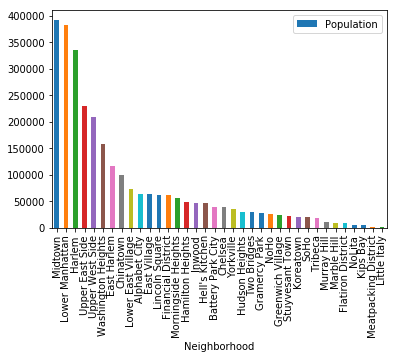

In [78]:
import matplotlib.pyplot as plt

df_pop.plot(kind='bar',x='Neighborhood',y='Population')
plt.show()


In [79]:
df_pop_sorted = df_pop.sort_values('Population',ascending=False)

df_pop_sorted = df_pop_sorted.drop('Rank', axis=1)

In [81]:
df_pop_sorted.head(2)

Neighborhood  Population
1          Midtown    391371.0
2  Lower Manhattan    382654.0

In [82]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [16, 6]

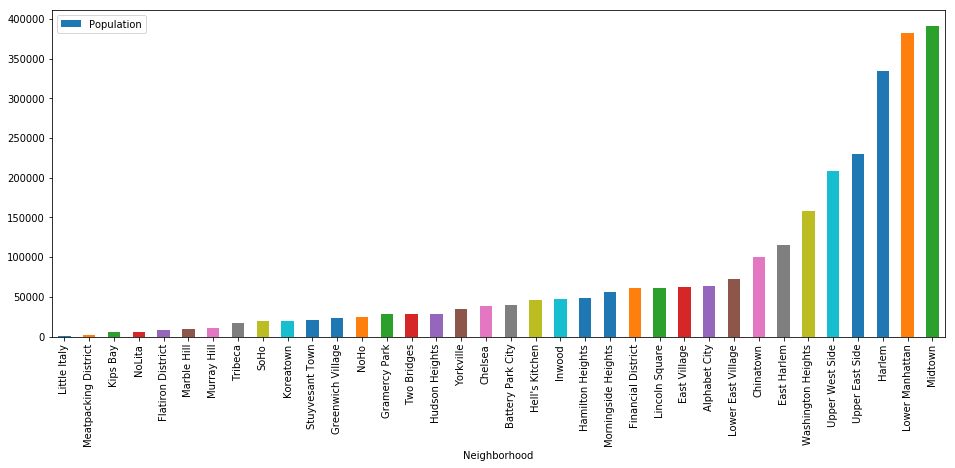

In [123]:
#df_pop_sorted = df_pop_sorted.sort_values('Population')
#df_pop_sorted.plot(figsize=(16,6))
fig, ax = plt.subplots()
df_pop_sorted.plot(kind='bar', x='Neighborhood', y='Population', ax=ax)
plt.show()

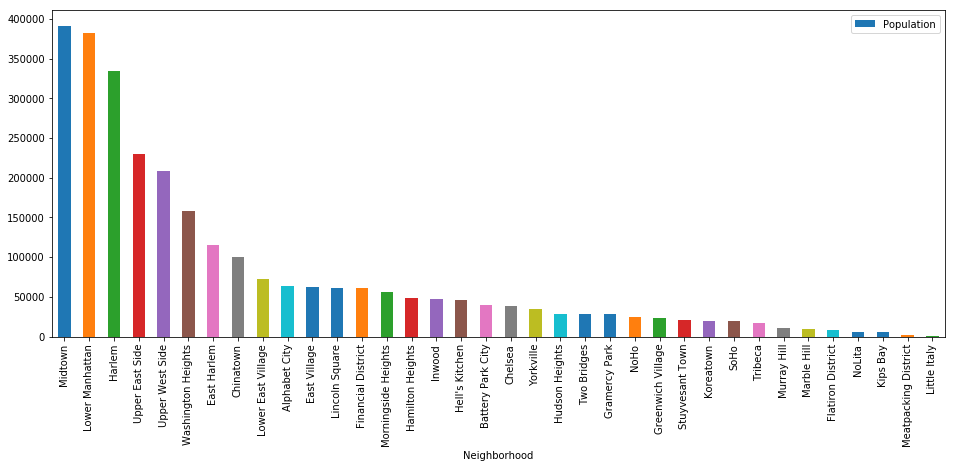

In [83]:
df_pop.plot(kind='bar',x='Neighborhood',y='Population')
plt.show()

In [84]:
df_pop

Rank          Neighborhood  Population
1     1               Midtown    391371.0
2     2       Lower Manhattan    382654.0
3     3                Harlem    335109.0
4     4       Upper East Side    229688.0
5     5       Upper West Side    209084.0
6     6    Washington Heights    158318.0
7     7           East Harlem    115921.0
8     8             Chinatown    100000.0
9     9    Lower East Village     72957.0
10   10         Alphabet City     63347.0
11   11          East Village     62832.0
12   12        Lincoln Square     61489.0
13   13    Financial District     60976.0
14   14   Morningside Heights     55929.0
15   15      Hamilton Heights     48520.0
16   16                Inwood     46746.0
17   17        Hell's Kitchen     45884.0
18   18     Battery Park City     39699.0
19   19               Chelsea     38242.0
20   20             Yorkville     35221.0
21   21        Hudson Heights     29000.0
22   22           Two Bridges     28915.0
23   23         Gramercy Park     27988.0
24   24                  NoHo     24846.0
25   25     Greenwich Village     22785.0
26   26       Stuyvesant Town     21049.0
27   27             Koreatown     20000.0
28   28                  SoHo     19573.0
29   29               Tribeca     17362.0
30   30           Murray Hill     10284.0
31   31           Marble Hill      9481.0
32   32     Flatiron District      8547.0
33   33                NoLita      5713.0
34   34              Kips Bay      5330.0
35   35  Meatpacking District      1428.0
36   36          Little Italy      1211.0

In [85]:
res_sum=allres.groupby('Neighborhood',as_index=False)
#['Venue Category'].count().sort_values(['Venue Category'], ascending=False)
#data.groupby(['month', 'item'])['date'].count()

In [86]:
res_sum=res_sum.size().sort_values(ascending=False)
res_sum.head()

Neighborhood
Murray Hill           44
Yorkville             40
West Village          40
Washington Heights    40
Central Harlem        39
dtype: int64

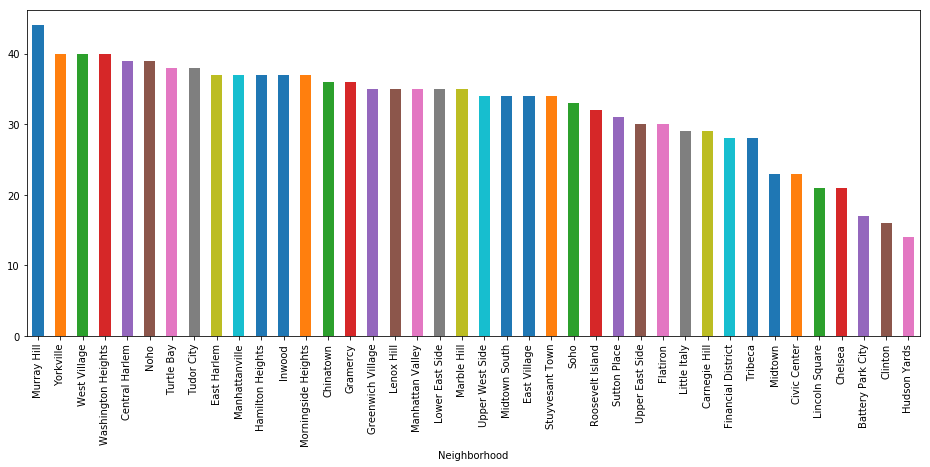

In [88]:
#res_sum.plot(figsize=(16,6))
res_sum.plot(kind='bar',x='Neighborhood')
plt.show()

In [100]:
allres.head()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
1  Marble Hill              40.876551               -73.91066   
2  Marble Hill              40.876551               -73.91066   
3  Marble Hill              40.876551               -73.91066   
4  Marble Hill              40.876551               -73.91066   
6  Marble Hill              40.876551               -73.91066   

                   Venue  Venue Latitude  Venue Longitude  \
1               Arturo's       40.874412       -73.910271   
2          Tibbett Diner       40.880404       -73.908937   
3            Sam's Pizza       40.879435       -73.905859   
4  Loeser's Delicatessen       40.879242       -73.905471   
6             El Malecon       40.879338       -73.904457   

         Venue Category  
1           Pizza Place  
2                 Diner  
3           Pizza Place  
4        Sandwich Place  
6  Caribbean Restaurant

In [101]:
allres.head()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
1  Marble Hill              40.876551               -73.91066   
2  Marble Hill              40.876551               -73.91066   
3  Marble Hill              40.876551               -73.91066   
4  Marble Hill              40.876551               -73.91066   
6  Marble Hill              40.876551               -73.91066   

                   Venue  Venue Latitude  Venue Longitude  \
1               Arturo's       40.874412       -73.910271   
2          Tibbett Diner       40.880404       -73.908937   
3            Sam's Pizza       40.879435       -73.905859   
4  Loeser's Delicatessen       40.879242       -73.905471   
6             El Malecon       40.879338       -73.904457   

         Venue Category  
1           Pizza Place  
2                 Diner  
3           Pizza Place  
4        Sandwich Place  
6  Caribbean Restaurant

In [90]:
res_sum1=allres.groupby('Venue Category',as_index=False)
#data.groupby(['month', 'item'])['date'].count()

In [91]:
res_sum1=res_sum1.size().sort_values(ascending=False)
res_sum1.head()

Venue Category
Italian Restaurant     128
Pizza Place            100
American Restaurant     86
Mexican Restaurant      64
Seafood Restaurant      55
dtype: int64

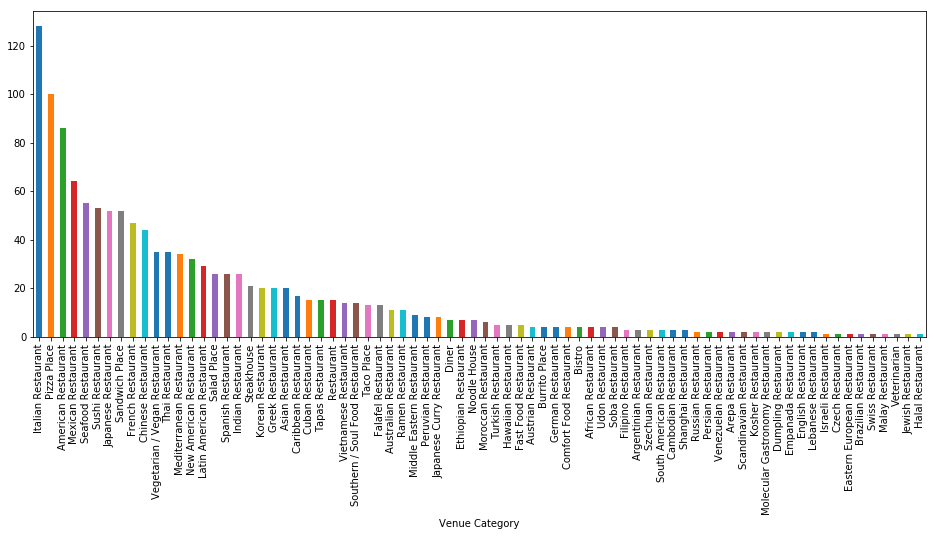

In [92]:
#res_sum1.plot(figsize=(16,6))
res_sum1.plot(kind='bar',x='Venue Category')
plt.show()

In [165]:
df_pop['Neighborhood'].sort_values()

10           Alphabet City
18       Battery Park City
19                 Chelsea
8                Chinatown
7              East Harlem
11            East Village
13      Financial District
32       Flatiron District
23           Gramercy Park
25       Greenwich Village
15        Hamilton Heights
3                   Harlem
17          Hell's Kitchen
21          Hudson Heights
16                  Inwood
34                Kips Bay
27               Koreatown
12          Lincoln Square
36            Little Italy
9       Lower East Village
2          Lower Manhattan
31             Marble Hill
35    Meatpacking District
1                  Midtown
14     Morningside Heights
30             Murray Hill
24                    NoHo
33                  NoLita
28                    SoHo
26         Stuyvesant Town
29                 Tribeca
22             Two Bridges
4          Upper East Side
5          Upper West Side
6       Washington Heights
20               Yorkville
Name: Neighborhood, dtype: o

In [166]:
mytemp=allres.groupby('Neighborhood',as_index=False).count().sort_values(['Neighborhood'])

In [167]:
mytemp['Neighborhood']

0       Battery Park City
1           Carnegie Hill
2          Central Harlem
3                 Chelsea
4               Chinatown
5            Civic Center
6                 Clinton
7             East Harlem
8            East Village
9      Financial District
10               Flatiron
11               Gramercy
12      Greenwich Village
13       Hamilton Heights
14           Hudson Yards
15                 Inwood
16             Lenox Hill
17         Lincoln Square
18           Little Italy
19        Lower East Side
20       Manhattan Valley
21         Manhattanville
22            Marble Hill
23                Midtown
24          Midtown South
25    Morningside Heights
26            Murray Hill
27                   Noho
28       Roosevelt Island
29                   Soho
30        Stuyvesant Town
31           Sutton Place
32                Tribeca
33             Tudor City
34             Turtle Bay
35        Upper East Side
36        Upper West Side
37     Washington Heights
38          

In [168]:
# create map of Manhattan using latitude and longitude values
map_allres = folium.Map(location=[latitude, longitude], zoom_start=11)

    
# add markers to map
for lat, lng, label in zip(manhattan_data['Latitude'], manhattan_data['Longitude'], manhattan_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=10,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.5,
        parse_html=False).add_to(map_allres)
    
map_allres

In [93]:
df_pop.loc[[10] ,['Neighborhood']] = 'East Village'

In [94]:
#34 Kips Bay =Murray Hill
#27 Koreatown=Midtown South
#35 Meatpacking District=Chelsea
#33 NoLita=Soho
#21 Hudson Heights=Hudson Yards
df_pop.loc[[34] ,['Neighborhood']] = 'Murray Hill'
df_pop.loc[[27] ,['Neighborhood']] = 'Midtown South'
df_pop.loc[[35] ,['Neighborhood']] = 'Chelsea'
df_pop.loc[[33] ,['Neighborhood']] = 'SoHo'
df_pop.loc[[21] ,['Neighborhood']] = 'Hudson Yards'

In [95]:
df_pop

Rank         Neighborhood  Population
1     1              Midtown    391371.0
2     2      Lower Manhattan    382654.0
3     3               Harlem    335109.0
4     4      Upper East Side    229688.0
5     5      Upper West Side    209084.0
6     6   Washington Heights    158318.0
7     7          East Harlem    115921.0
8     8            Chinatown    100000.0
9     9   Lower East Village     72957.0
10   10         East Village     63347.0
11   11         East Village     62832.0
12   12       Lincoln Square     61489.0
13   13   Financial District     60976.0
14   14  Morningside Heights     55929.0
15   15     Hamilton Heights     48520.0
16   16               Inwood     46746.0
17   17       Hell's Kitchen     45884.0
18   18    Battery Park City     39699.0
19   19              Chelsea     38242.0
20   20            Yorkville     35221.0
21   21         Hudson Yards     29000.0
22   22          Two Bridges     28915.0
23   23        Gramercy Park     27988.0
24   24                 NoHo     24846.0
25   25    Greenwich Village     22785.0
26   26      Stuyvesant Town     21049.0
27   27        Midtown South     20000.0
28   28                 SoHo     19573.0
29   29              Tribeca     17362.0
30   30          Murray Hill     10284.0
31   31          Marble Hill      9481.0
32   32    Flatiron District      8547.0
33   33                 SoHo      5713.0
34   34          Murray Hill      5330.0
35   35              Chelsea      1428.0
36   36         Little Italy      1211.0

In [174]:
df_pop.head(2)

Rank     Neighborhood  Population
1    1          Midtown    391371.0
2    2  Lower Manhattan    382654.0

In [96]:
df_pop2 =df_pop.groupby('Neighborhood',as_index=False).sum()

In [97]:
df_pop2

Neighborhood  Population
0     Battery Park City     39699.0
1               Chelsea     39670.0
2             Chinatown    100000.0
3           East Harlem    115921.0
4          East Village    126179.0
5    Financial District     60976.0
6     Flatiron District      8547.0
7         Gramercy Park     27988.0
8     Greenwich Village     22785.0
9      Hamilton Heights     48520.0
10               Harlem    335109.0
11       Hell's Kitchen     45884.0
12         Hudson Yards     29000.0
13               Inwood     46746.0
14       Lincoln Square     61489.0
15         Little Italy      1211.0
16   Lower East Village     72957.0
17      Lower Manhattan    382654.0
18          Marble Hill      9481.0
19              Midtown    391371.0
20        Midtown South     20000.0
21  Morningside Heights     55929.0
22          Murray Hill     15614.0
23                 NoHo     24846.0
24                 SoHo     25286.0
25      Stuyvesant Town     21049.0
26              Tribeca     17362.0
27          Two Bridges     28915.0
28      Upper East Side    229688.0
29      Upper West Side    209084.0
30   Washington Heights    158318.0
31            Yorkville     35221.0

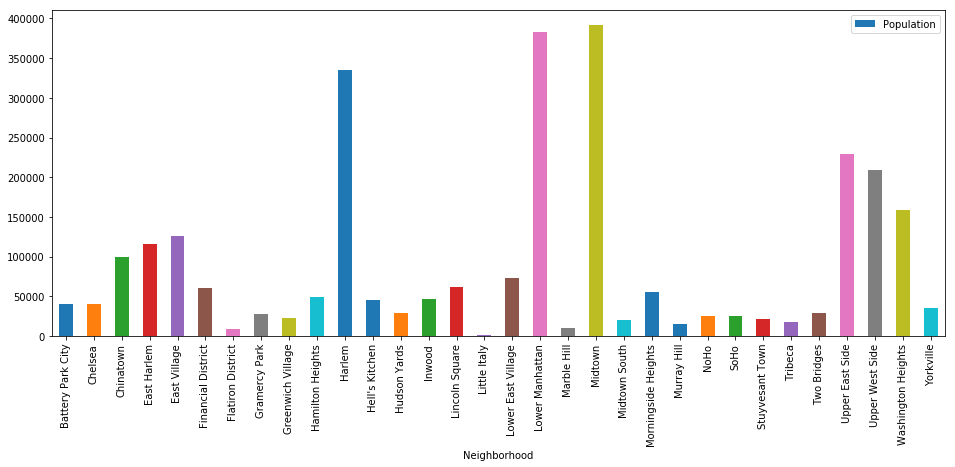

In [98]:
df_pop2.plot(kind='bar',x='Neighborhood',y='Population')
plt.show()

In [103]:
#df_pop2=df_pop2.sort_values(ascending=False)
df_pop2 = df_pop2.sort_values(['Population'],ascending=False)
df_pop2.head()

Neighborhood  Population
19          Midtown    391371.0
17  Lower Manhattan    382654.0
10           Harlem    335109.0
28  Upper East Side    229688.0
29  Upper West Side    209084.0

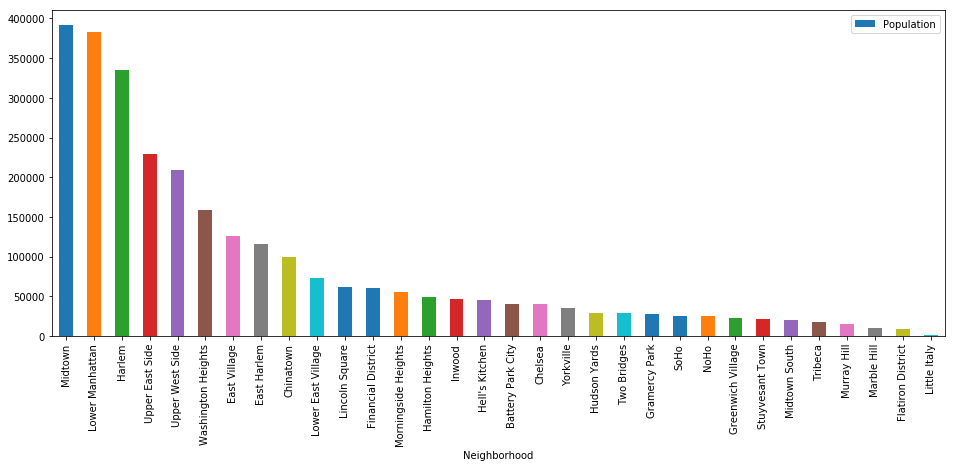

In [104]:
df_pop2.plot(kind='bar',x='Neighborhood',y='Population')
plt.show()